In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bp
import plotly.express as px


In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [3]:
df.shape

(195, 6)

In [4]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [5]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [6]:
df['Rate'] = df['Rate'].astype(int)

In [7]:

lst = ['Rate', 'Count', 'Year']
float_cols = df.select_dtypes(float).columns
df.apply(pd.to_numeric, errors='coerce')
print(float_cols)
df

Index([], dtype='object')


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [8]:
df_sorted_count = df[['Count', 'Location']].sort_values('Count', ascending=False).reset_index(drop=True).head(5)
df_sorted_count['Perc'] =  df_sorted_count['Count']*100/df_sorted_count['Count'].sum()

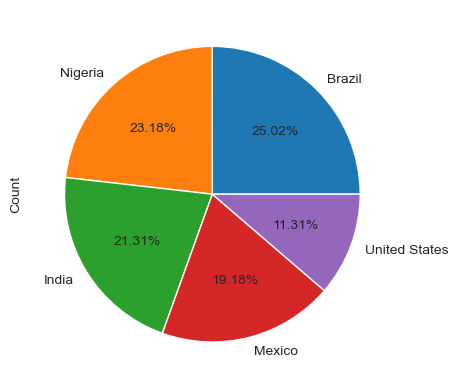

In [9]:
df_sorted_count.plot(x='Location', y='Count', kind='pie',  labels=df_sorted_count.Location, autopct='%1.2f%%')
plt.legend().set_visible(False)

In [16]:
(df.groupby('Region')['Count'].sum()).sort_values(ascending=False, kind='quicksort',ignore_index=False)

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

In [23]:
x=df.groupby('Subregion')['Count'].sum().sort_values(ascending=False, kind='quicksort',ignore_index=False)

In [24]:
x.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

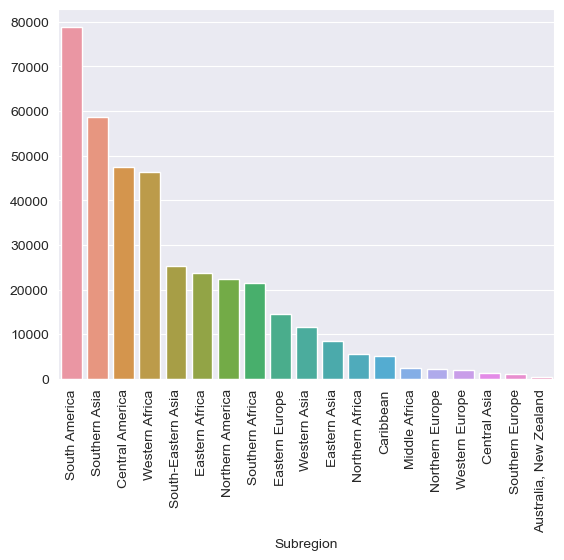

In [39]:
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=90)
xlabel=None

,Year,Region
0,2018,Asia
1,2020,Europe
2,2020,Africa
3,2020,Europe
4,2012,Africa
...,...,...
190,2018,Americas
191,2011,Asia
192,2013,Asia
193,2015,Africa


In [57]:
df_ = df[df['Region'].isin(['Asia','Europe'])]

In [58]:
df_4 = df_[df_['Year']>2016][['Region','Year', 'Count']]

In [59]:
df_4= df_4.groupby(['Region','Year']).sum()['Count']

In [60]:
unstacked_df_4 = df_4.unstack(level=0)
unstacked_df_4

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


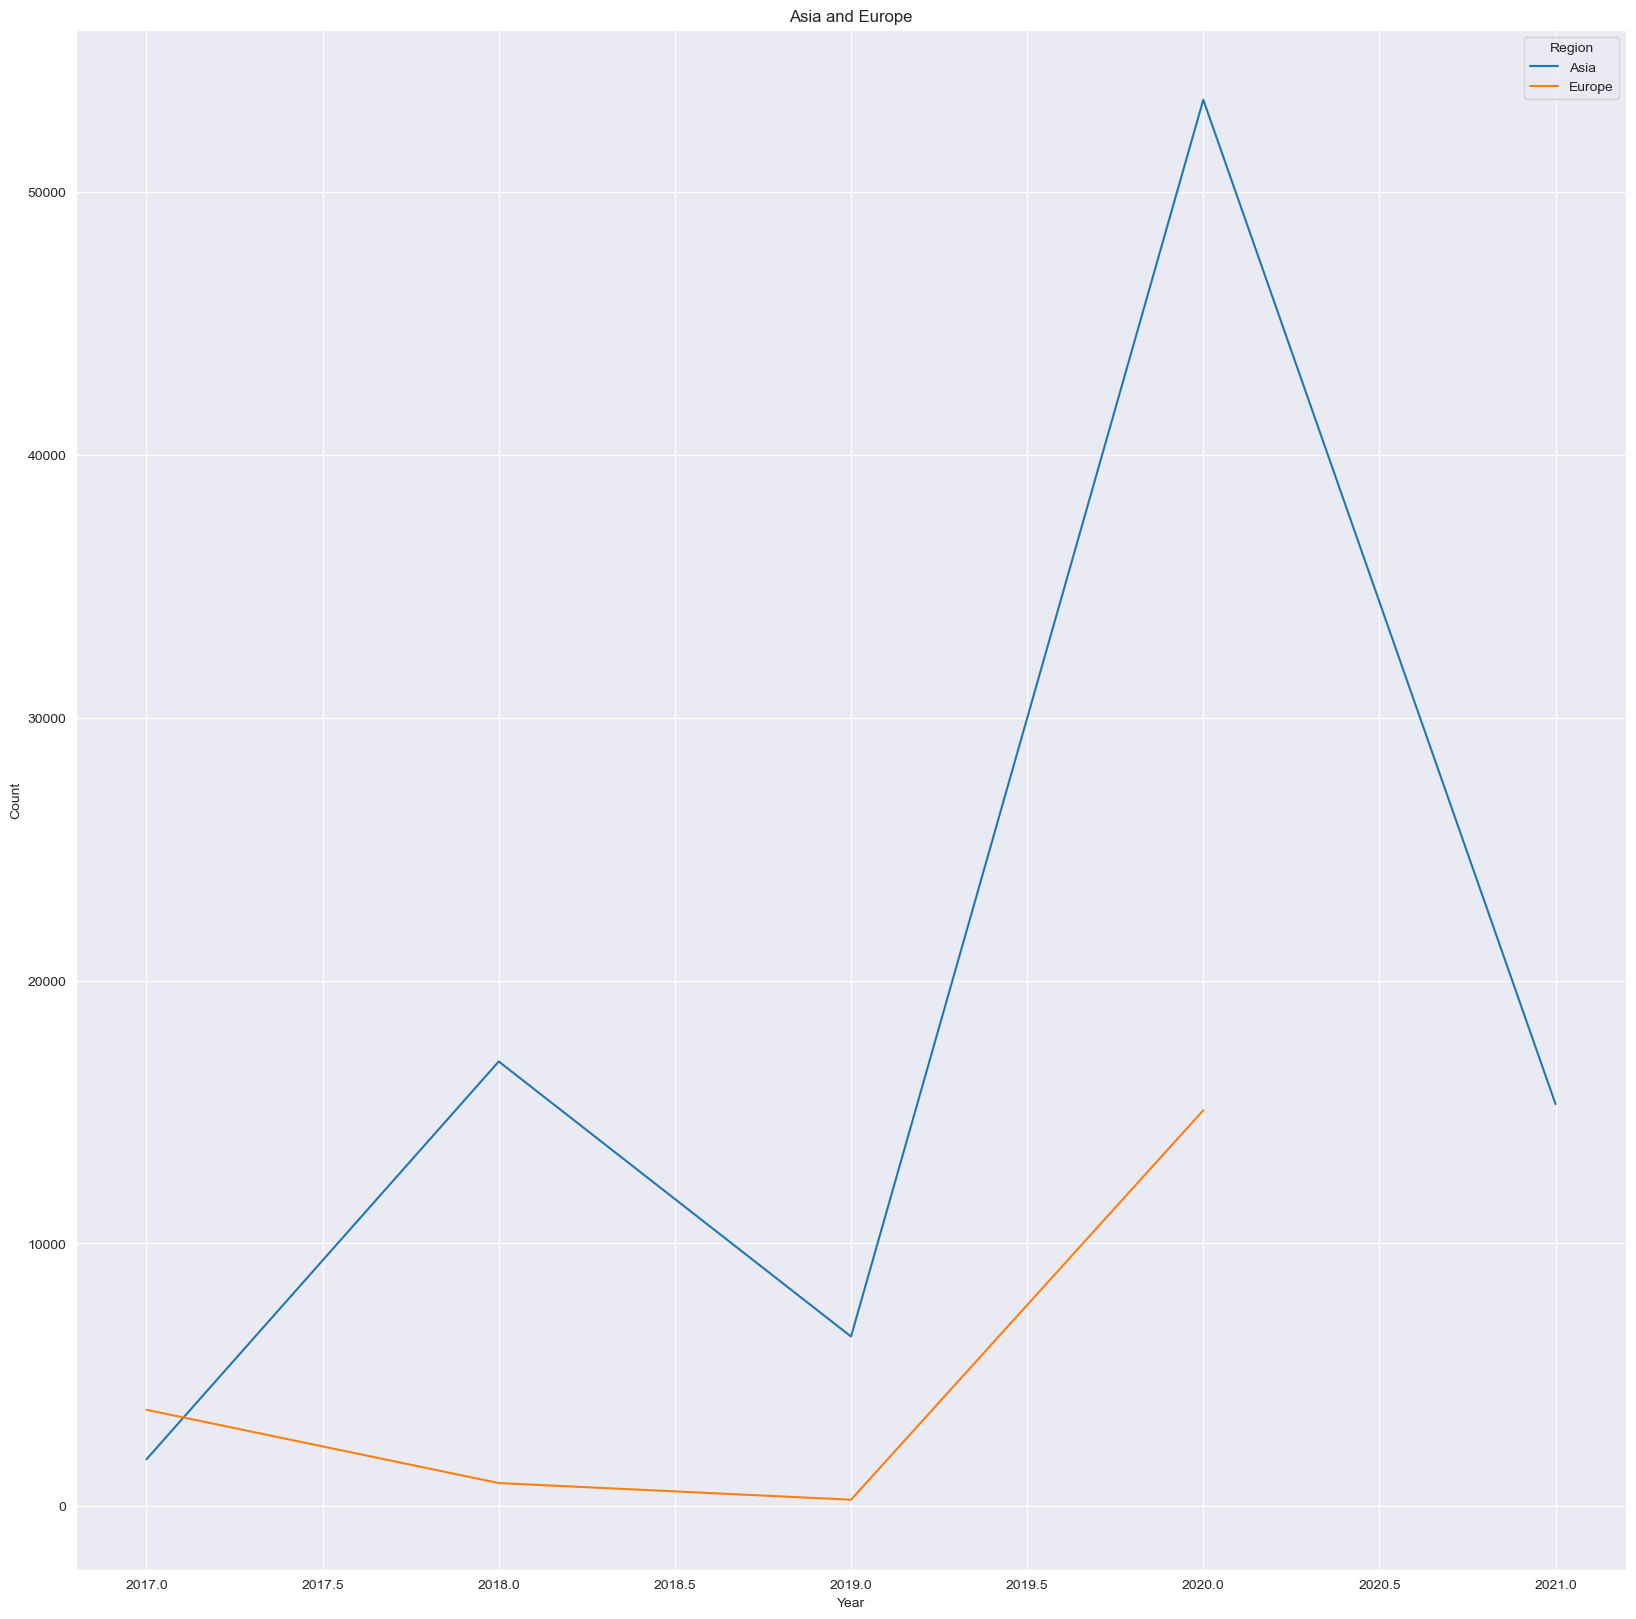

In [67]:
unstacked_df_4.plot(kind='line',figsize=(20,20))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Asia and Europe')
plt.show()

In [68]:
df_5 = df.groupby('Year')['Rate'].sum().sort_values(ascending=False, kind='quicksort',ignore_index=False)

In [70]:
df_5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

<Axes: xlabel='Year'>

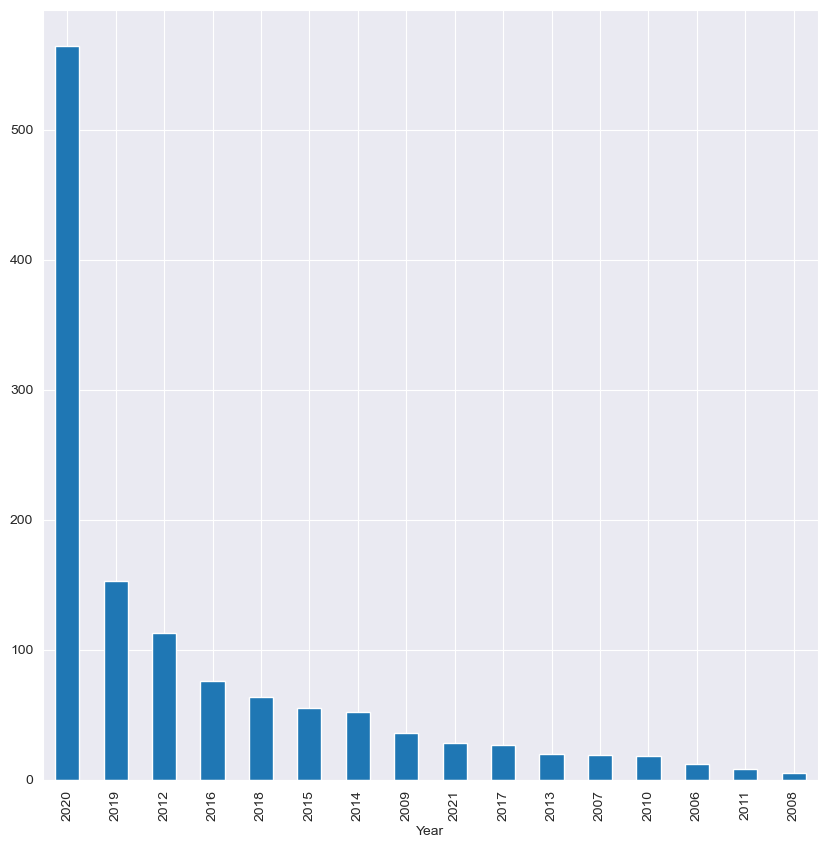

In [71]:
df_5.plot(kind='bar', figsize=(10,10))

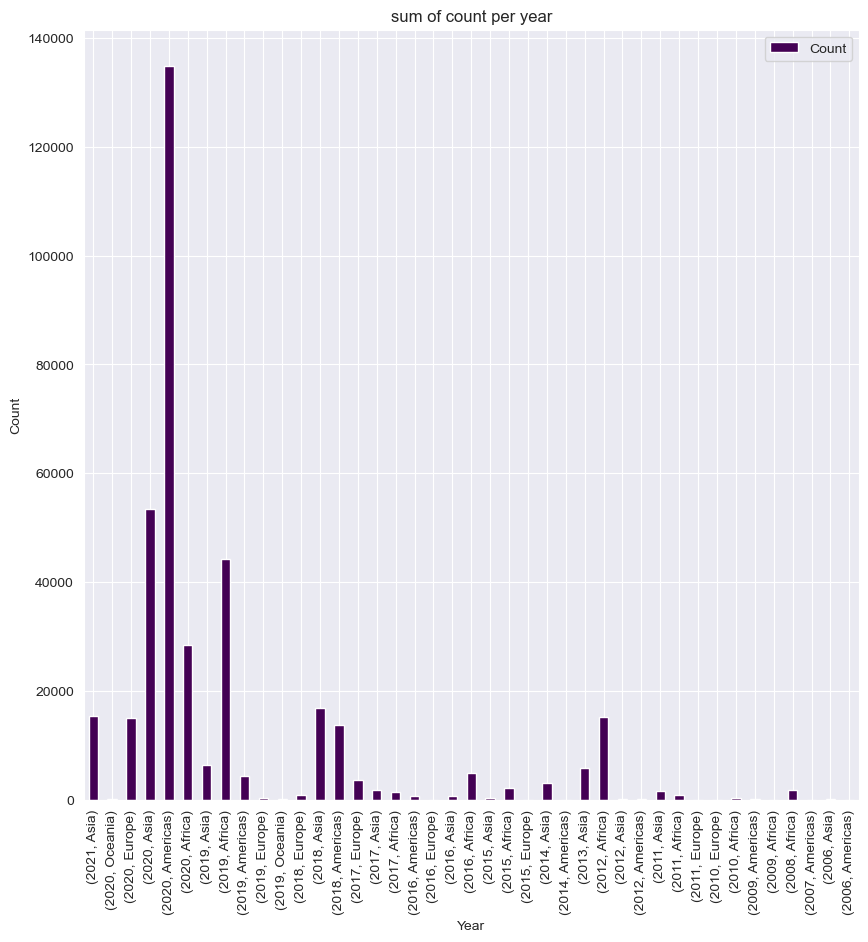

In [76]:
df[['Year','Region','Count']].groupby(['Year','Region']).sum().sort_values(by='Year', ascending=False, kind='quicksort',ignore_index=False).plot(kind='bar', figsize=(10,10),colormap='viridis')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('sum of count per year')
plt.show()

In [94]:
df___7 = df_grouped_meaned = df.groupby('Subregion')['Count'].mean(numeric_only=True).sort_values( ascending=False, kind='quicksort',ignore_index=False).astype('float16')


In [106]:
df_final = pd.DataFrame(
    {
        'Category':df___7.index,
        'Value':df___7.values
    }
)

In [109]:
figure = px.treemap(
    df, path=['Category'], values=df_final.Value,title='Treemap'
)
figure.update_traces(hovertemplate="Category: %{label}<br>Value:%{value}")
figure.show()